# Heat Demand

### 1) Head Demand Dataset

In [2]:
# Import data set
import pandas as pd
hd = pd.read_pickle("extracted_heat_demand_20210816.pkl")
hd.head()

,timestamps,r000105.m4r1.demand_warm_water_kw,r000106.m4r2.demand_warm_water_kw,r000107.m4r3.demand_warm_water_kw,r000108.m4r4.demand_warm_water_kw,r000109.m4r5.demand_warm_water_kw,r000105.m4r1.demand_floor_heating_kw,r000106.m4r2.demand_floor_heating_kw,r000107.m4r3.demand_floor_heating_kw,r000108.m4r4.demand_floor_heating_kw,r000109.m4r5.demand_floor_heating_kw
0,1561939200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1561939260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1561939320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1561939380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1561939440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Transform POSIX timestamp to date time and set it as index
hd.drop_duplicates(subset=["timestamps"])
hd["timestamps"] = pd.to_datetime(hd["timestamps"], unit="s")
hd = hd.set_index("timestamps")
hd


,r000105.m4r1.demand_warm_water_kw,r000106.m4r2.demand_warm_water_kw,r000107.m4r3.demand_warm_water_kw,r000108.m4r4.demand_warm_water_kw,r000109.m4r5.demand_warm_water_kw,r000105.m4r1.demand_floor_heating_kw,r000106.m4r2.demand_floor_heating_kw,r000107.m4r3.demand_floor_heating_kw,r000108.m4r4.demand_floor_heating_kw,r000109.m4r5.demand_floor_heating_kw
timestamps,,,,,,,,,,
2019-07-01 00:00:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:01:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:02:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:03:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:04:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-31 23:55:00,0.0,0.361482,0.057000,0.314045,0.0,0.0,0.830143,3.293242,-0.641068,0.0
2021-07-31 23:56:00,0.0,0.362221,0.056564,0.314690,0.0,0.0,0.830672,3.282200,-0.653871,0.0
2021-07-31 23:57:00,0.0,0.362959,0.056128,0.315334,0.0,0.0,0.831200,3.271158,-0.666674,0.0


In [4]:
# Format time to one -averaged- sample per day 
# (to plot easily and get intuition on the data set)
hd_1d = hd.resample('1D').mean()
hd_1d.head()
hd_1d

,r000105.m4r1.demand_warm_water_kw,r000106.m4r2.demand_warm_water_kw,r000107.m4r3.demand_warm_water_kw,r000108.m4r4.demand_warm_water_kw,r000109.m4r5.demand_warm_water_kw,r000105.m4r1.demand_floor_heating_kw,r000106.m4r2.demand_floor_heating_kw,r000107.m4r3.demand_floor_heating_kw,r000108.m4r4.demand_floor_heating_kw,r000109.m4r5.demand_floor_heating_kw
timestamps,,,,,,,,,,
2019-07-01,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-02,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-03,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-04,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-05,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-27,0.0,0.058120,0.150035,0.127461,0.0,0.0,0.575017,0.431203,-0.268463,0.0
2021-07-28,0.0,0.033199,0.154214,0.193133,0.0,0.0,0.543989,1.097928,-0.377275,0.0
2021-07-29,0.0,0.100658,0.199545,0.145866,0.0,0.0,0.613571,1.877243,-0.358132,0.0


The extracted heat demand dataset at this stage contains:
- data for 762 days (2019-07-01 to 2021-07-31),
- for 5 sites (105, 106, 107, 108, 109),
- about *warm water* and *floor heating* demand,
- both measured in *KW* 

In [5]:
# Check variable type
hd_1d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2019-07-01 to 2021-07-31
Freq: D
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   r000105.m4r1.demand_warm_water_kw     762 non-null    float64
 1   r000106.m4r2.demand_warm_water_kw     762 non-null    float64
 2   r000107.m4r3.demand_warm_water_kw     762 non-null    float64
 3   r000108.m4r4.demand_warm_water_kw     762 non-null    float64
 4   r000109.m4r5.demand_warm_water_kw     762 non-null    float64
 5   r000105.m4r1.demand_floor_heating_kw  762 non-null    float64
 6   r000106.m4r2.demand_floor_heating_kw  762 non-null    float64
 7   r000107.m4r3.demand_floor_heating_kw  762 non-null    float64
 8   r000108.m4r4.demand_floor_heating_kw  762 non-null    float64
 9   r000109.m4r5.demand_floor_heating_kw  762 non-null    float64
dtypes: float64(10)
memory usage: 65.5 KB


In [6]:
# Check amount of days
hd_1d.shape

(762, 10)

In [7]:
# Check available sites and variables
hd_1d.columns

Index(['r000105.m4r1.demand_warm_water_kw',
       'r000106.m4r2.demand_warm_water_kw',
       'r000107.m4r3.demand_warm_water_kw',
       'r000108.m4r4.demand_warm_water_kw',
       'r000109.m4r5.demand_warm_water_kw',
       'r000105.m4r1.demand_floor_heating_kw',
       'r000106.m4r2.demand_floor_heating_kw',
       'r000107.m4r3.demand_floor_heating_kw',
       'r000108.m4r4.demand_floor_heating_kw',
       'r000109.m4r5.demand_floor_heating_kw'],
      dtype='object')

In [8]:
# Check no value is missing
hd.isnull().sum()

r000105.m4r1.demand_warm_water_kw       0
r000106.m4r2.demand_warm_water_kw       0
r000107.m4r3.demand_warm_water_kw       0
r000108.m4r4.demand_warm_water_kw       0
r000109.m4r5.demand_warm_water_kw       0
r000105.m4r1.demand_floor_heating_kw    0
r000106.m4r2.demand_floor_heating_kw    0
r000107.m4r3.demand_floor_heating_kw    0
r000108.m4r4.demand_floor_heating_kw    0
r000109.m4r5.demand_floor_heating_kw    0
dtype: int64

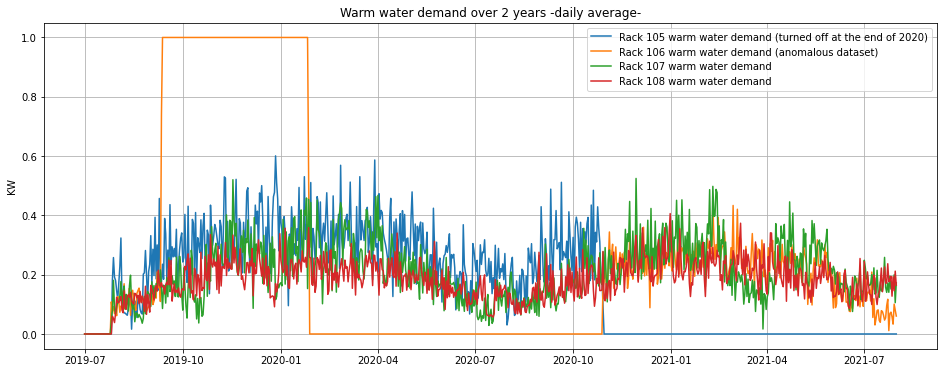

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 6))
plt.title("Warm water demand over 2 years -daily average-")
plt.plot(hd_1d["r000105.m4r1.demand_warm_water_kw"], label='Rack 105 warm water demand (turned off at the end of 2020)')
plt.plot(hd_1d["r000106.m4r2.demand_warm_water_kw"], label='Rack 106 warm water demand (anomalous dataset)')
plt.plot(hd_1d["r000107.m4r3.demand_warm_water_kw"], label='Rack 107 warm water demand')
plt.plot(hd_1d["r000108.m4r4.demand_warm_water_kw"], label='Rack 108 warm water demand')
plt.ylabel("KW")
plt.legend()
plt.grid()
plt.show()

In [10]:
# We predict and study 108
hd108 = hd["r000108.m4r4.demand_warm_water_kw"].interpolate()

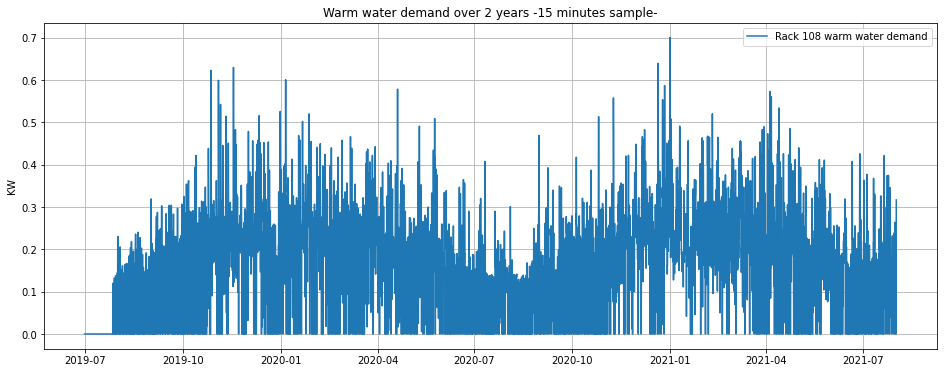

In [11]:
# Plot selected rack (108)
fig = plt.figure(figsize=(16, 6))
plt.title("Warm water demand over 2 years -15 minutes sample-")
plt.plot(hd108, label='Rack 108 warm water demand')
plt.ylabel("KW")
plt.legend()
plt.grid()
plt.show()

In [12]:
hd

,r000105.m4r1.demand_warm_water_kw,r000106.m4r2.demand_warm_water_kw,r000107.m4r3.demand_warm_water_kw,r000108.m4r4.demand_warm_water_kw,r000109.m4r5.demand_warm_water_kw,r000105.m4r1.demand_floor_heating_kw,r000106.m4r2.demand_floor_heating_kw,r000107.m4r3.demand_floor_heating_kw,r000108.m4r4.demand_floor_heating_kw,r000109.m4r5.demand_floor_heating_kw
timestamps,,,,,,,,,,
2019-07-01 00:00:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:01:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:02:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:03:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2019-07-01 00:04:00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-31 23:55:00,0.0,0.361482,0.057000,0.314045,0.0,0.0,0.830143,3.293242,-0.641068,0.0
2021-07-31 23:56:00,0.0,0.362221,0.056564,0.314690,0.0,0.0,0.830672,3.282200,-0.653871,0.0
2021-07-31 23:57:00,0.0,0.362959,0.056128,0.315334,0.0,0.0,0.831200,3.271158,-0.666674,0.0


In [13]:
import numpy as np
def prepare_heat_demand(hd, rack="r000108", node="m4r4", metric="demand_warm_water_kw"):
    hd_resampled = hd.resample("15min").mean()

    start = hd_resampled.index[0].timestamp() # Return POSIX timestamp
    end = hd_resampled.index[-1].timestamp()  # Return POSIX timestamp
    step_seconds = 15 * 60 # 15 minutes in seconds
    hd_resampled["timestamps"] = np.arange(start, end + step_seconds, step_seconds)

    hd_resampled = hd_resampled[[f"{rack}.{node}.{metric}", "timestamps"]]

    hd_resampled = hd_resampled.set_index("timestamps")
    
    return hd_resampled

In [14]:
hd108_prep = prepare_heat_demand(hd)
hd108_prep

,r000108.m4r4.demand_warm_water_kw
timestamps,
1.561939e+09,0.000000
1.561940e+09,0.000000
1.561941e+09,0.000000
1.561942e+09,0.000000
1.561943e+09,0.000000
...,...
1.627772e+09,0.273442
1.627772e+09,0.283109
1.627773e+09,0.292777


In [15]:
hd108_prep.replace(0, np.nan, inplace=True)
hd108_prep = hd108_prep.dropna()
hd108_prep # This is the target data frame

,r000108.m4r4.demand_warm_water_kw
timestamps,
1.564214e+09,0.009709
1.564214e+09,0.030513
1.564215e+09,0.051318
1.564216e+09,0.072122
1.564217e+09,0.092926
...,...
1.627772e+09,0.273442
1.627772e+09,0.283109
1.627773e+09,0.292777


### 2) Weather Dataset

In [16]:
wd = pd.read_pickle("processed_weather_data_ham.pkl")
wd.head()

,Name,Temperature,Precipitation,Wind_Speed,Wind_Gust,Visibility,Cloud_Cover,Relative_Humidity,Weather_Type,Conditions,effective_wind_chill,effective_heat_index
timestamps,,,,,,,,,,,,
1.561939e+09,"Hamburg, Deutschland",16.1,0.0,8.9,0.0,NaN,11.625,86.58,NaN,Clear,16.1,16.1
1.561940e+09,"Hamburg, Deutschland",16.1,0.0,9.6,3.1,10.0,15.500,86.18,NaN,Clear,16.1,16.1
1.561941e+09,"Hamburg, Deutschland",15.7,0.0,7.7,3.8,NaN,20.250,90.47,NaN,Clear,15.7,15.7
1.561942e+09,"Hamburg, Deutschland",15.7,0.0,7.3,0.0,10.0,25.000,90.54,NaN,Clear,15.7,15.7
1.561943e+09,"Hamburg, Deutschland",15.1,0.0,7.3,0.0,NaN,12.600,90.50,NaN,Clear,15.1,15.1


In [17]:
# Format time in index
wd.index = pd.to_datetime(wd.index, unit="s")
wd

,Name,Temperature,Precipitation,Wind_Speed,Wind_Gust,Visibility,Cloud_Cover,Relative_Humidity,Weather_Type,Conditions,effective_wind_chill,effective_heat_index
timestamps,,,,,,,,,,,,
2019-07-01 00:00:00,"Hamburg, Deutschland",16.1,0.00,8.9,0.0,NaN,11.625,86.58,NaN,Clear,16.1,16.1
2019-07-01 00:15:00,"Hamburg, Deutschland",16.1,0.00,9.6,3.1,10.0,15.500,86.18,NaN,Clear,16.1,16.1
2019-07-01 00:30:00,"Hamburg, Deutschland",15.7,0.00,7.7,3.8,NaN,20.250,90.47,NaN,Clear,15.7,15.7
2019-07-01 00:45:00,"Hamburg, Deutschland",15.7,0.00,7.3,0.0,10.0,25.000,90.54,NaN,Clear,15.7,15.7
2019-07-01 01:00:00,"Hamburg, Deutschland",15.1,0.00,7.3,0.0,NaN,12.600,90.50,NaN,Clear,15.1,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 23:00:00,"Hamburg, Deutschland",15.6,0.00,14.7,NaN,NaN,92.900,93.77,NaN,Clear,15.6,15.6
2021-06-30 23:15:00,"Hamburg, Deutschland",15.6,0.20,14.0,9.8,9.6,93.300,93.85,Light Rain,"Rain, Overcast",15.6,15.6
2021-06-30 23:30:00,"Hamburg, Deutschland",16.5,0.14,12.8,6.9,NaN,83.650,88.14,NaN,Rain,16.5,16.5


In [18]:
wd.shape

(70177, 12)

In [19]:
# Check variable type
wd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70177 entries, 2019-07-01 00:00:00 to 2021-07-01 00:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  70177 non-null  category
 1   Temperature           70177 non-null  float64 
 2   Precipitation         70177 non-null  float64 
 3   Wind_Speed            70177 non-null  float64 
 4   Wind_Gust             56448 non-null  float64 
 5   Visibility            51896 non-null  float64 
 6   Cloud_Cover           70177 non-null  float64 
 7   Relative_Humidity     70177 non-null  float64 
 8   Weather_Type          6316 non-null   category
 9   Conditions            70177 non-null  category
 10  effective_wind_chill  70177 non-null  float64 
 11  effective_heat_index  70177 non-null  float64 
dtypes: category(3), float64(9)
memory usage: 5.6 MB


In [20]:
# Check no value is missing
wd.isnull().sum()

Name                        0
Temperature                 0
Precipitation               0
Wind_Speed                  0
Wind_Gust               13729
Visibility              18281
Cloud_Cover                 0
Relative_Humidity           0
Weather_Type            63861
Conditions                  0
effective_wind_chill        0
effective_heat_index        0
dtype: int64

In [21]:
# Drop Weather_Type
wd = wd.drop(columns=["Weather_Type"])
# Interpolate missing NaN values
wd['Visibility'] = wd['Visibility'].interpolate()
wd['Wind_Gust'] = wd['Wind_Gust'].interpolate()
wd.head()

,Name,Temperature,Precipitation,Wind_Speed,Wind_Gust,Visibility,Cloud_Cover,Relative_Humidity,Conditions,effective_wind_chill,effective_heat_index
timestamps,,,,,,,,,,,
2019-07-01 00:00:00,"Hamburg, Deutschland",16.1,0.0,8.9,0.0,NaN,11.625,86.58,Clear,16.1,16.1
2019-07-01 00:15:00,"Hamburg, Deutschland",16.1,0.0,9.6,3.1,10.0,15.500,86.18,Clear,16.1,16.1
2019-07-01 00:30:00,"Hamburg, Deutschland",15.7,0.0,7.7,3.8,10.0,20.250,90.47,Clear,15.7,15.7
2019-07-01 00:45:00,"Hamburg, Deutschland",15.7,0.0,7.3,0.0,10.0,25.000,90.54,Clear,15.7,15.7
2019-07-01 01:00:00,"Hamburg, Deutschland",15.1,0.0,7.3,0.0,10.0,12.600,90.50,Clear,15.1,15.1


In [22]:
# Check no value is missing
wd.isnull().sum()

Name                    0
Temperature             0
Precipitation           0
Wind_Speed              0
Wind_Gust               0
Visibility              1
Cloud_Cover             0
Relative_Humidity       0
Conditions              0
effective_wind_chill    0
effective_heat_index    0
dtype: int64

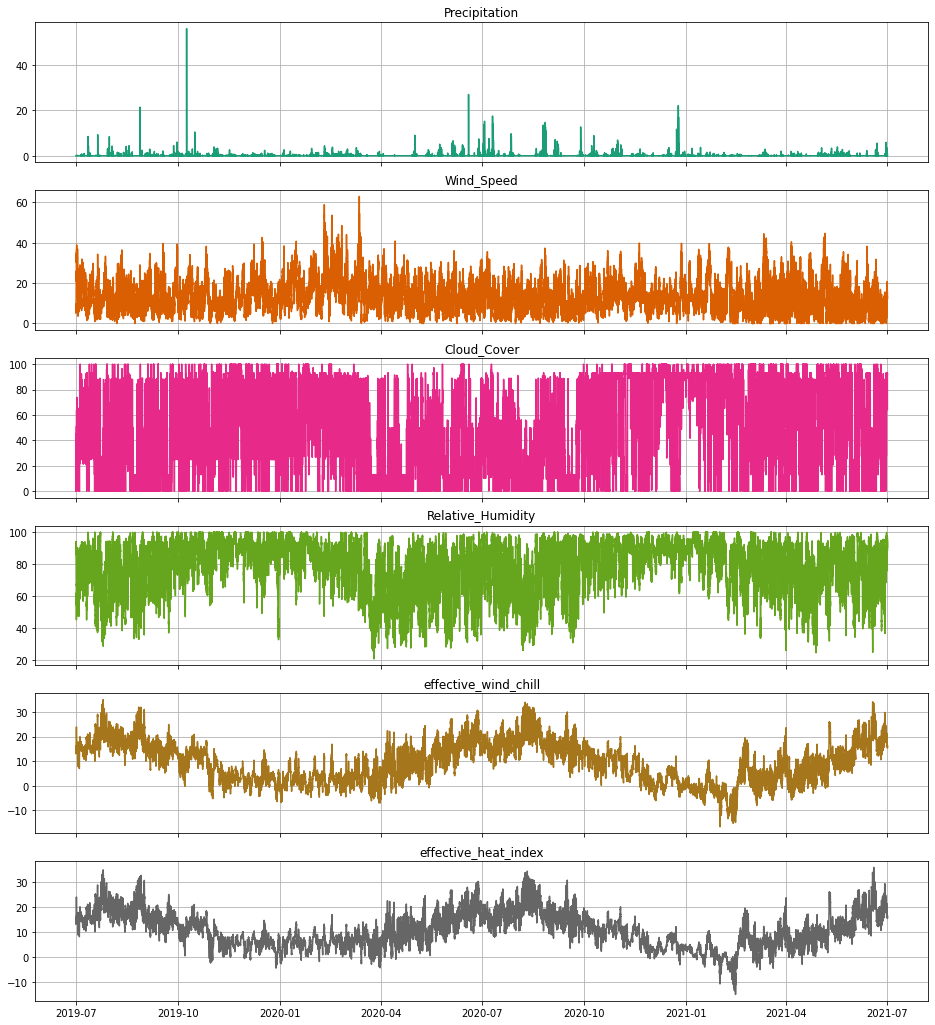

In [23]:
# Plot weather dataset
columns = ['Precipitation', 'Wind_Speed', 'Cloud_Cover', 'Relative_Humidity', 'effective_wind_chill', 'effective_heat_index']
fig, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(16, len(columns)*3))
cmap = plt.cm.get_cmap('Dark2', len(columns))

for c, column in enumerate(columns):
    axs[c].set_title(column)
    axs[c].plot(wd[column], label=column, color=cmap(c))
    axs[c].grid()

plt.show()

In [24]:
# Drop coumns
wd = wd.drop(columns=["Visibility"])
wd = wd.drop(columns=["Wind_Gust"])  # 
wd = wd.drop(columns=["Name"])       # Name of the region (Hamburg)
wd = wd.drop(columns=["Conditions"]) # Clear, Rain, Overcast, etc.
wd

,Temperature,Precipitation,Wind_Speed,Cloud_Cover,Relative_Humidity,effective_wind_chill,effective_heat_index
timestamps,,,,,,,
2019-07-01 00:00:00,16.1,0.00,8.9,11.625,86.58,16.1,16.1
2019-07-01 00:15:00,16.1,0.00,9.6,15.500,86.18,16.1,16.1
2019-07-01 00:30:00,15.7,0.00,7.7,20.250,90.47,15.7,15.7
2019-07-01 00:45:00,15.7,0.00,7.3,25.000,90.54,15.7,15.7
2019-07-01 01:00:00,15.1,0.00,7.3,12.600,90.50,15.1,15.1
...,...,...,...,...,...,...,...
2021-06-30 23:00:00,15.6,0.00,14.7,92.900,93.77,15.6,15.6
2021-06-30 23:15:00,15.6,0.20,14.0,93.300,93.85,15.6,15.6
2021-06-30 23:30:00,16.5,0.14,12.8,83.650,88.14,16.5,16.5


In [25]:
def prepare_weather_data(wd, steps=20, step_size=5): # best 50
    
    sampled_wd = wd
    concat = sampled_wd.copy(deep=True)
    for step in range(1, steps + 1):
        shifted = sampled_wd.shift(step * step_size)
        concat = concat.join(shifted, rsuffix=f"_{ -1 * step * step_size}")
        
    return concat

In [26]:
steps=20
step_size=5
wd_prep = prepare_weather_data(wd, steps=steps, step_size=step_size)
wd_prep = wd_prep.dropna() 
wd_prep

,Temperature,Precipitation,Wind_Speed,Cloud_Cover,Relative_Humidity,effective_wind_chill,effective_heat_index,Temperature_-5,Precipitation_-5,Wind_Speed_-5,...,Relative_Humidity_-95,effective_wind_chill_-95,effective_heat_index_-95,Temperature_-100,Precipitation_-100,Wind_Speed_-100,Cloud_Cover_-100,Relative_Humidity_-100,effective_wind_chill_-100,effective_heat_index_-100
timestamps,,,,,,,,,,,,,,,,,,,,,
2019-07-02 01:00:00,16.0,0.00,19.5,54.50,78.22,16.0,16.0,16.0,0.00,15.3,...,90.20,15.1,15.1,16.1,0.0,8.9,11.625,86.58,16.1,16.1
2019-07-02 01:15:00,16.0,0.00,19.1,35.20,77.86,16.0,16.0,16.0,0.00,18.1,...,93.81,15.1,15.1,16.1,0.0,9.6,15.500,86.18,16.1,16.1
2019-07-02 01:30:00,16.0,0.00,18.1,49.85,78.44,16.0,16.0,16.0,0.00,18.9,...,93.93,15.1,15.1,15.7,0.0,7.7,20.250,90.47,15.7,15.7
2019-07-02 01:45:00,16.0,0.00,19.1,64.50,78.22,16.0,16.0,16.0,0.00,17.8,...,90.40,15.0,15.0,15.7,0.0,7.3,25.000,90.54,15.7,15.7
2019-07-02 02:00:00,15.4,0.00,20.8,68.45,86.41,15.4,15.4,16.0,0.00,17.8,...,90.38,15.0,15.0,15.1,0.0,7.3,12.600,90.50,15.1,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 23:00:00,15.6,0.00,14.7,92.90,93.77,15.6,15.6,16.0,0.15,13.5,...,95.16,18.0,18.0,19.2,0.1,5.8,56.650,90.34,19.2,19.2
2021-06-30 23:15:00,15.6,0.20,14.0,93.30,93.85,15.6,15.6,16.0,1.25,15.1,...,92.94,17.7,17.7,18.9,0.0,5.5,65.100,89.69,18.9,18.9
2021-06-30 23:30:00,16.5,0.14,12.8,83.65,88.14,16.5,16.5,16.2,0.00,16.1,...,95.43,17.9,17.9,19.0,0.0,4.8,64.650,91.20,19.0,19.0


With the shifting we end up with 7 + 7 * 20 = 147 columns:

In [27]:
wd_prep.shape

(70077, 147)

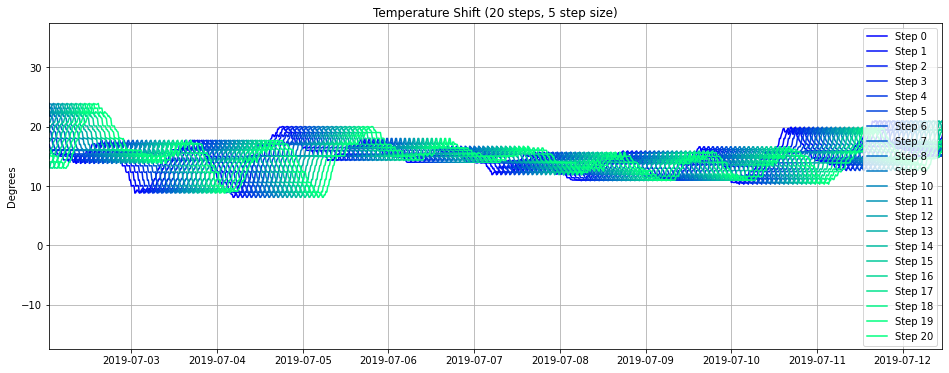

In [28]:
# Plot shifted temperature
fig = plt.figure(figsize=(16, 6))
cmap = plt.cm.get_cmap('winter', steps)

plt.title("Temperature Shift ({} steps, {} step size)".format(steps, step_size))
plt.plot(wd_prep["Temperature"], label='Step {}'.format(0), color=cmap(0))
for step in range(1, steps + 1):
    plt.plot(wd_prep["Temperature_{}".format(-1 * step * step_size)], label='Step {}'.format(step), color=cmap(step))
plt.ylabel("Degrees")
plt.xlim([wd_prep.index[0], wd_prep.index[1000]])
plt.legend()
plt.grid()
plt.show()

In [29]:
# Bring the datasets back to posix timestamp
wd_prep.index = pd.to_datetime(wd_prep.index).astype(int) / 10**9

/tmp/ipykernel_505/1377623296.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  wd_prep.index = pd.to_datetime(wd_prep.index).astype(int) / 10**9


### 3) Merge both heat demand and weather datasets

In [30]:
result = wd_prep.join(hd108_prep, how='outer')
result_wo_na = result.dropna()
result_wo_na

,Temperature,Precipitation,Wind_Speed,Cloud_Cover,Relative_Humidity,effective_wind_chill,effective_heat_index,Temperature_-5,Precipitation_-5,Wind_Speed_-5,...,effective_wind_chill_-95,effective_heat_index_-95,Temperature_-100,Precipitation_-100,Wind_Speed_-100,Cloud_Cover_-100,Relative_Humidity_-100,effective_wind_chill_-100,effective_heat_index_-100,r000108.m4r4.demand_warm_water_kw
timestamps,,,,,,,,,,,,,,,,,,,,,
1.564214e+09,20.3,0.00,18.9,0.00,73.31,20.3,20.3,18.7,0.00,15.1,...,21.2,21.2,19.1,0.0,10.5,0.00,73.51,19.1,19.1,0.009709
1.564214e+09,20.5,0.00,21.0,11.10,69.70,20.5,20.5,18.6,0.00,14.4,...,21.9,21.9,19.2,0.0,11.0,0.00,70.71,19.2,19.2,0.030513
1.564215e+09,21.0,0.00,20.9,0.00,69.70,21.0,21.0,19.0,0.00,14.6,...,22.8,22.8,19.9,0.0,10.9,0.00,69.50,19.9,19.9,0.051318
1.564216e+09,22.0,0.00,18.9,0.00,66.16,22.0,22.0,19.4,0.00,15.6,...,22.8,22.8,20.7,0.0,12.5,0.00,70.75,20.7,20.7,0.072122
1.564217e+09,22.0,0.00,17.8,0.00,66.80,22.0,22.0,20.3,0.00,20.0,...,23.0,23.0,20.8,0.0,12.5,0.00,70.76,20.8,20.8,0.092926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.625094e+09,15.6,0.00,14.7,92.90,93.77,15.6,15.6,16.0,0.15,13.5,...,18.0,18.0,19.2,0.1,5.8,56.65,90.34,19.2,19.2,0.174757
1.625095e+09,15.6,0.20,14.0,93.30,93.85,15.6,15.6,16.0,1.25,15.1,...,17.7,17.7,18.9,0.0,5.5,65.10,89.69,18.9,18.9,0.174757
1.625096e+09,16.5,0.14,12.8,83.65,88.14,16.5,16.5,16.2,0.00,16.1,...,17.9,17.9,19.0,0.0,4.8,64.65,91.20,19.0,19.0,0.174757


In [31]:
from datetime import date
print("first sample: {}".format(date.fromtimestamp(result_wo_na.index[0])))
print("last sample: {}".format(date.fromtimestamp(result_wo_na.index[-1])))
print("sample count: {}".format(result_wo_na.index.size))

first sample: 2019-07-27
last sample: 2021-06-30
sample count: 60393


In [32]:
# for validation purposes the last 20k rows are cut
from copy import deepcopy
X = deepcopy(result_wo_na.iloc[:-20000,:-1])
y = deepcopy(result_wo_na.iloc[:-20000,-1:])
print("sample count: X={}, y={}".format(len(X), len(y)))

sample count: X=40393, y=40393


In [33]:
# random split of 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("sample count: X_train={}, y_train={}".format(len(X_train), len(y_train)))
print("sample count: X_test={}, y_test={}".format(len(X_test), len(y_test)))

sample count: X_train=32314, y_train=32314
sample count: X_test=8079, y_test=8079


### 4.a) Training XGB
(direct from xgboost lib)

In [34]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
print("DMatrix dtrain num_col: {}, num_row: {}".format(
dtrain.num_col(), 
dtrain.num_row()))
params = {'eta': 0.1}
model = xgb.train(params=params, 
                  dtrain=dtrain, 
                  num_boost_round=50,
                  verbose_eval=True)
# predict using the plaintext prediction
plaintext_predict = model.predict(xgb.DMatrix(X_test))
len(plaintext_predict)

DMatrix dtrain num_col: 147, num_row: 32314


### 4.b) Training XGBRegressor 
(from Scikit-Learn Wrapper interface for XGBoost)

In [42]:
# https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
xgbr = xgb.XGBRegressor(verbosity=1, n_estimators=2500) 
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [43]:
xgbr.fit(X_train, y_train)

[15:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [44]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.8009654112865812


In [45]:
score = xgbr.score(X_test, y_test)  
print("Training score: ", score)

Training score:  0.6110925975305144


In [49]:
model = xgbr.get_booster()
model.dump_model('heat.txt')

### Encryption Preparation for XGBoost Model
1. Set up some metadata information for the dataset.
2. Set up the encryption materials
3. Encrypt the model
4. Encrypt the query
5. Perform the prediction
6. Decrypt the prediction

In [52]:
# 1. parsing to internal tree data structure, and output feature set
from ppxgboost import BoosterParser as boostparser
min_max = boostparser.training_dataset_parser(X_test)
enc_tree, feature_set, min_max = boostparser.model_to_trees(model, min_max)


In [53]:
# 2. Set up encryption materials.
from secrets import token_bytes
prf_key = token_bytes(16)
from ppxgboost import PaillierAPI as paillier
public_key, private_key = paillier.he_key_gen()
import sys
sys.path.append('../third-party')
from ope.pyope.ope import OPE
encrypter = OPE(token_bytes(16))
from ppxgboost.PPKey import PPBoostKey
ppBoostKey = PPBoostKey(public_key, prf_key, encrypter)

In [54]:
# 3. process the tree into enc_tree
from ppxgboost import PPBooster as ppbooster
from ppxgboost.PPBooster import MetaData
ppbooster.enc_xgboost_model(ppBoostKey, enc_tree, MetaData(min_max))

 ...]

In [55]:
# 4. Encrypts the input vector for prediction (using prf_key_hash and ope-encrypter) based on the feature set.
ppbooster.enc_input_vector(prf_key, encrypter, feature_set, X_test, MetaData(min_max))

/home/juanfraire/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


KeyboardInterrupt: 

In [ ]:
# 5. privacy-preserving evaluation.
import time
start = time.time()
values = ppbooster.predict_binary(enc_tree, X_test)
end = time.time()
print("Elapsed Time: ", end - start)

In [1088]:
# evaluate predictions
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

AttributeError: 'DataFrame' object has no attribute 'feature_names'

### 4.b) Training GBR

In [1073]:
# training parameters
params = {'n_estimators': 2500,     #4500
          'max_depth': 16,          #14 #16
          'min_samples_split': 2,   #2 #2
          'learning_rate': 0.012,   #0,015 #0.012
          'loss': 'ls',
          'subsample': 0.12,        #0.13 #0.12
          'max_features': 50,       #48 #50
          'verbose': 1}

In [1074]:
# GBR model
from sklearn import datasets, ensemble
gbr = ensemble.GradientBoostingRegressor(**params)


In [1075]:
# Train
# gbr.fit(X_train, y_train)

In [1076]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
score = gbr.score(X_test,y_test)
print("The score on test set: {:.4f}".format(score))

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
plt.plot(y_test[50:200], label='realData')
plt.plot(y_pred[50:200], label='predicted')
plt.legend(loc="upper left",prop={'size': 20})
plt.grid()
plt.show()